# **1. Introduction**

- CarLoop is an Indian automotive e-commerce platform that serves as a comprehensive marketplace for buying and selling new and used cars, as well as providing related services such as insurance, financing, vehicle maintenance, and expert reviews.
- This project focuses on performing Exploratory Data Analysis (EDA) on a used-car dataset sourced from the platform. The goal is to uncover meaningful patterns related to car pricing, brand popularity, vehicle age, mileage, fuel type, and other important features that influence buyer decisions and market value.

- By examining these insights, stakeholders such as sellers, buyers, dealerships, and platform managers can make informed decisions about pricing strategies, inventory planning, customer segmentation, and improving overall user experience.

# **2. Problem Statement**

- With the rapid digital transformation of the automotive market in India, online platforms have become essential for connecting used-car buyers and sellers. As competition increases and customer preferences evolve, understanding market trends, pricing behavior, and vehicle attributes has become crucial for optimizing platform performance.

- The objective of this project is to derive actionable insights that can help CarLoop make informed business decisions.

# **3. Installing, Updating & Importing Libraries**

In [1]:
# # Install optional libraries for interactive and dynamic visualizations
# !pip install --quiet plotly bokeh

# # Install the updated profiling library for generating automated EDA reports
# !pip install --quiet ydata-profiling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

# pd.set_option('future.no_silent_downcasting', True)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

# Importing warning to disable runtime warnings
import warnings

# Warnings will appear only once
warnings.filterwarnings("ignore")

# **4. Data Acquisition & Description**

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/amrit1426/EDA-on-used-car-e-commerce-platform-/refs/heads/main/20251115_CarLoop_Dataset.csv')
df.head(3)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.000,1680.000,1505.000,5.000,35.000
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.000,1695.000,1555.000,5.000,42.000
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.000,1595.000,1550.000,5.000,35.000


In [4]:
df.shape

(2059, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [6]:
df.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2059.000,2059.000,2059.000,1995.000,1995.000,1995.000,1995.000,1946.000
mean,1702991.696,2016.425,54224.714,4280.861,1767.992,1591.735,5.306,52.002
std,2419880.635,3.364,57361.721,442.459,135.266,136.074,0.822,15.110
min,49000.000,1988.000,0.000,3099.000,1475.000,1165.000,2.000,15.000
25%,484999.000,2014.000,29000.000,3985.000,1695.000,1485.000,5.000,41.250
50%,825000.000,2017.000,50000.000,4370.000,1770.000,1545.000,5.000,50.000
75%,1925000.000,2019.000,72000.000,4629.000,1831.500,1675.000,5.000,60.000
max,35000000.000,2022.000,2000000.000,5569.000,2220.000,1995.000,8.000,105.000


# **5. Data Pre-Profiling | Univariate Analysis**
- In this section, we use ydata-profiling to automatically generate an initial overview of the dataset. This report helps us understand basic data characteristics such as distributions, missing values, and potential data quality issues before performing detailed preprocessing and EDA.

In [7]:
report = ProfileReport(df=df)
report.to_file("20251115_UsedCarPreProfilingReport-v1.0.html")
# report.to_notebook_iframe() # Run this line to make the profile report accesible in the notebook itself

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


%|                                                                                           | 0/20 [00:00<?, ?it/s]
%|████▏                                                                              | 1/20 [00:00<00:04,  4.01it/s]
%|████████▎                                                                          | 2/20 [00:00<00:06,  2.69it/s]
%|█████████████████████████████████▏                                                 | 8/20 [00:01<00:01,  8.16it/s]
%|█████████████████████████████████████████████                                     | 11/20 [00:01<00:00, 10.07it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  9.21it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# **6. Data Pre-Processing**

- We will verify and manipulate the integrity of the data in this section:
    - Handling missing data
    - Handling redundant data
    - Handling inconsistent data
    - Handling outliers
    - Handling typos

In [8]:
# Saving a copy before treating the df
dfc=df.copy()

## Redundant Data Treatment

In [9]:
# Checking for duplicates
dfc.duplicated().sum()

np.int64(0)

## Outlier Capping & Flooring (Winsorization) Using Quantile Limits

In [10]:
# listing numerical columns
dfc.select_dtypes(['int','float']).columns

Index(['Price', 'Year', 'Kilometer', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')

In [11]:
# List of columns where outliers will be treated
outlier_cols = ['Price', 'Kilometer']

# Loop through each column in the list to apply the capping process
for i in outlier_cols:

    # Compute the lower 2nd percentile and upper 98th percentile thresholds
    lower_limit = dfc[i].quantile(0.02)
    upper_limit = dfc[i].quantile(0.98)

    # Ensure the column is numeric before clipping
    dfc[i] = dfc[i].astype(float)

    # Cap values below lower_limit and above upper_limit
    dfc[i] = dfc[i].clip(lower=lower_limit, upper=upper_limit)

## Feature Engineering

##### Extracting Useful Data by Cleaning the Columns

In [12]:
# Split 'Max Power' & 'Max Torque' using '@' as separator
dfc[['Max Power bhp', 'Max Power rpm']] = dfc['Max Power'].str.split('@', expand=True)
dfc[['Max Torque Nm', 'Max Torque rpm']] = dfc['Max Torque'].str.split('@', expand=True)

# Drop original 'Max Power' and 'Max Torque' columns as they are now redundant
dfc = dfc.drop(['Max Power', 'Max Torque'], axis=1)

# List of string columns that need unit removal and numeric conversion
str_cols = ['Engine', 'Max Power bhp', 'Max Power rpm', 'Max Torque Nm', 'Max Torque rpm']

# Remove unnecessary from string columns
dfc[str_cols] = dfc[str_cols].replace({" cc": '', " bhp": '', " rpm": '', " Nm": ''}, regex=True)

# Convert the cleaned string columns to numeric, coercing errors to NaN
dfc[str_cols] = dfc[str_cols].apply(pd.to_numeric, errors='coerce')

##### Creating More Useful Features from Existing Columns

In [13]:
dfc['Age of Car'] = pd.Timestamp('now').year - dfc['Year']

##### Finding the Volume of the Cars

In [14]:
dfc['Volume'] = dfc['Length']*dfc['Width']*dfc['Height']

## Missing Value Treatment

In [15]:
# Loop through each column in the dataframe
for i in dfc.columns:

    # Check if the column is of object type (categorical)
    if dfc[i].dtypes == 'object':
        # Replace empty strings with NaN
        # dfc[i] = dfc[i].replace('', np.nan)
        # Fill missing values with the mode (most frequent value)
        dfc[i] = dfc[i].fillna(dfc[i].mode()[0])
    else:
        # For numerical columns, fill missing values with the median
        dfc[i] = dfc[i].fillna(dfc[i].median())

In [16]:
# Verifying the result
dfc.isna().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
Max Power bhp         0
Max Power rpm         0
Max Torque Nm         0
Max Torque rpm        0
Age of Car            0
Volume                0
dtype: int64

In [17]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   float64
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   float64
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              2059 non-null   float64
 12  Drivetrain          2059 non-null   object 
 13  Length              2059 non-null   float64
 14  Width               2059 non-null   float64
 15  Height              2059 non-null   float64
 16  Seatin

In [18]:
dfc.describe()

,Price,Year,Kilometer,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Max Power bhp,Max Power rpm,Max Torque Nm,Max Torque rpm,Age of Car,Volume
count,2059.000,2059.000,2059.000,2059.000,2059.000,2059.000,2059.000,2059.000,2059.000,2059.000,2059.000,2059.000,2059.000,2059.000,2059.000
mean,1596608.015,2016.425,52247.446,1685.016,4283.631,1768.054,1590.283,5.297,51.892,129.083,4809.184,244.070,2591.588,8.575,12153997680.965
std,1778805.339,3.364,29767.999,632.220,435.799,133.146,134.187,0.811,14.697,63.851,1082.062,137.993,1190.786,3.364,2534312103.789
min,195000.000,1988.000,4416.000,624.000,3099.000,1475.000,1165.000,2.000,15.000,35.000,2910.000,48.000,150.000,3.000,7461361250.000
25%,484999.000,2014.000,29000.000,1198.000,3986.000,1695.000,1485.000,5.000,42.000,83.000,4000.000,115.000,1600.000,6.000,10344444880.000
50%,825000.000,2017.000,50000.000,1498.000,4370.000,1770.000,1545.000,5.000,50.000,116.000,4200.000,200.000,1900.000,8.000,11727722000.000
75%,1925000.000,2019.000,72000.000,1995.000,4620.000,1831.000,1672.000,5.000,60.000,169.000,6000.000,343.000,4000.000,11.000,13481387175.000
max,8084000.000,2022.000,130000.000,6592.000,5569.000,2220.000,1995.000,8.000,105.000,660.000,8250.000,780.000,6500.000,37.000,21236875200.000


# **7. Data Post-Profiling**

- In this section, we generate a second profiling report after completing data cleaning and preprocessing.
The goal is to compare changes, verify data quality improvements, and ensure that issues such as missing values, inconsistencies, or outliers have been properly addressed.

In [19]:
report = ProfileReport(df=dfc)
report.to_file("20251115_UsedCarPostProfilingReport-v2.0.html")
# report.to_notebook_iframe() # Run this line to make the profile report accesible in the notebook itself

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


%|                                                                                           | 0/24 [00:00<?, ?it/s]
%|███▍                                                                               | 1/24 [00:00<00:06,  3.42it/s]
%|██████▉                                                                            | 2/24 [00:00<00:08,  2.67it/s]
%|██████████▍                                                                        | 3/24 [00:00<00:05,  3.78it/s]
%|████████████████████████▏                                                          | 7/24 [00:01<00:01,  9.62it/s]
%|███████████████████████████████▏                                                   | 9/24 [00:01<00:01,  7.61it/s]
%|██████████████████████████████████▏                                               | 10/24 [00:01<00:01,  7.77it/s]
%|██████████████████████████████████████████████████████████                        | 17/24 [00:01<00:00, 14.67it/s]
100%|██████████████████████████████████████████████████████████

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# **8. EDA**

#### Average Price Per Make (Brand)

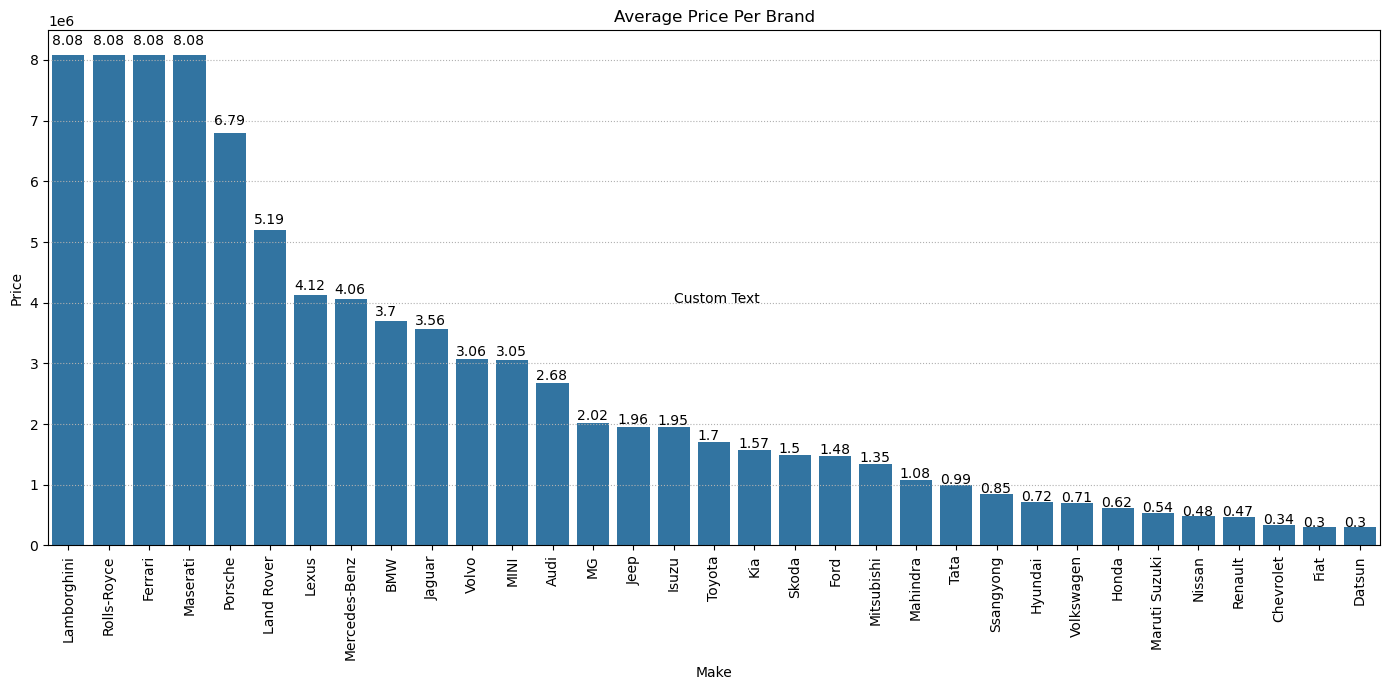

In [20]:
plot_data=dfc.groupby('Make').agg({'Price':'mean'}).sort_values('Price',ascending=False)
fig,my_canvas=plt.subplots(figsize=(14,7))
sns.barplot(data=plot_data,x='Make',y='Price',estimator='mean', errorbar=('ci',False))
plt.title("Average Price Per Brand")
plt.xticks(rotation=90)
plt.grid(linestyle=':', axis='y')

# Annotation on bars
for bar in my_canvas.patches:
    bar_height = bar.get_height()
    bar_height_in_mills = round(bar_height / (10 ** 6), 2)
    bar_x = bar.get_x()
    my_canvas.annotate(text=bar_height_in_mills, xy=(bar_x, bar_height*1.02))
    
# Annotation on anywhere on the plot    
my_canvas.annotate(text='Custom Text', xy=(15, 4000000))

plt.tight_layout()
plt.show()

#### Average Price Per Manufacturing Year

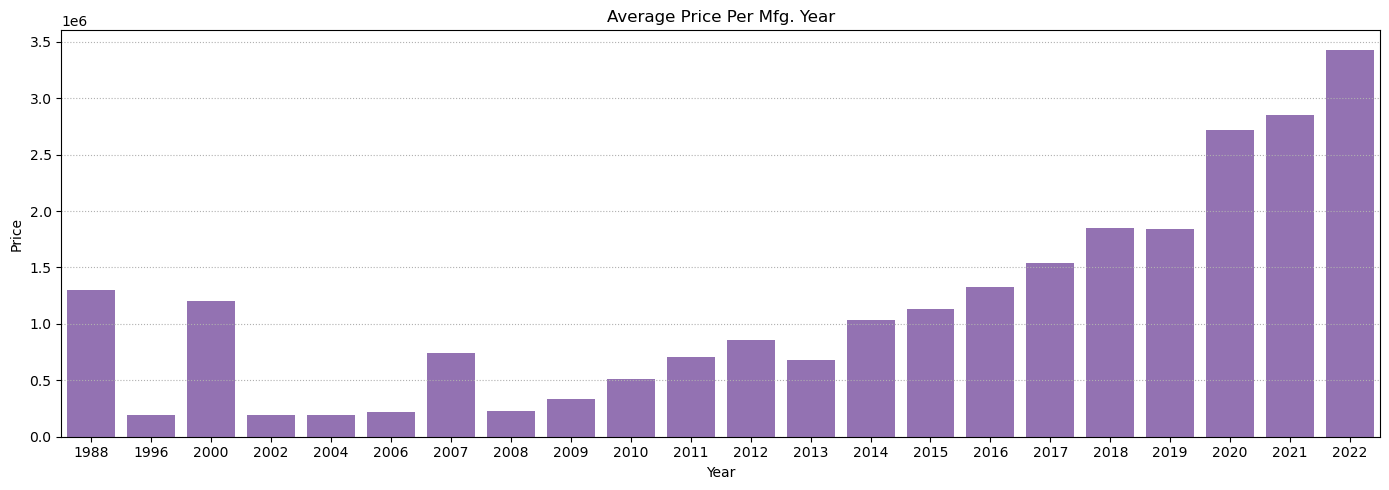

In [21]:
fig,my_canvas=plt.subplots(figsize=(14,5))
plot_data2=dfc.groupby('Year').agg({'Price':'mean'})
sns.barplot(data=dfc, x='Year', y='Price', estimator='mean', errorbar=('ci',False), color='#9467bd')
plt.title("Average Price Per Mfg. Year")
plt.grid(linestyle=':', axis='y')
plt.tight_layout()
plt.show()

#### Fuel Type vs Price

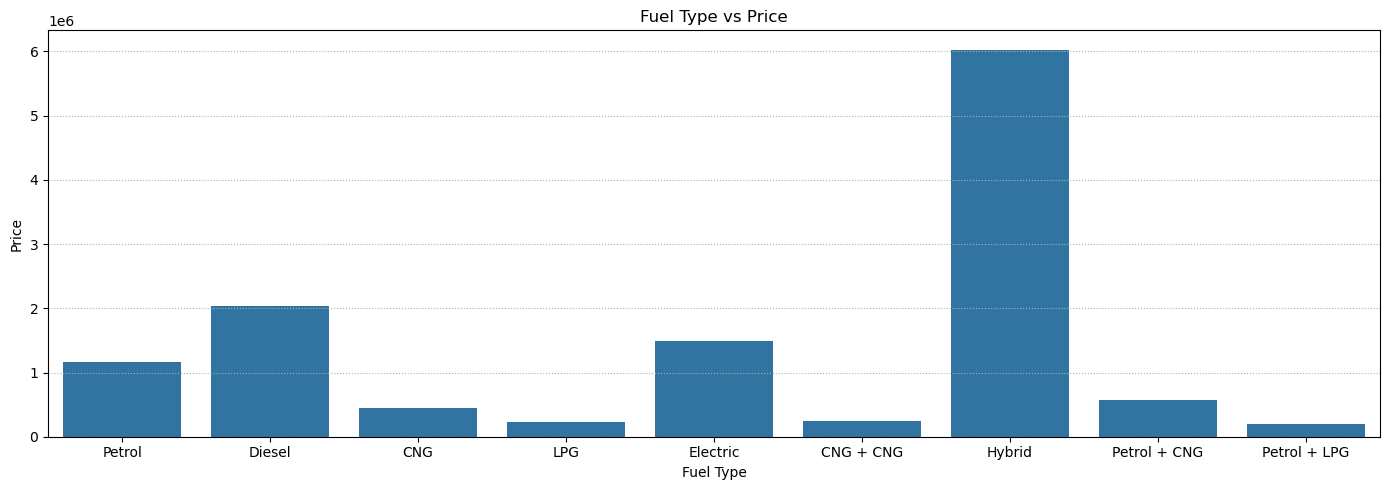

In [22]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.barplot(data=dfc, x='Fuel Type', y='Price', estimator='mean', ax=ax, errorbar=('ci', False))
plt.title("Fuel Type vs Price")
plt.grid(linestyle=':', axis='y')
plt.tight_layout()
plt.show()

 ### 5 Most Economical Brands

In [23]:
plot_data.tail(5)

,Price
Make,
Nissan,482187.500
Renault,469581.302
Chevrolet,341999.857
Fiat,305000.000
Datsun,297875.000


#### Avg. Price Trend For Most Economical Brands Per Year

In [24]:
eco_make=plot_data.tail(7).index

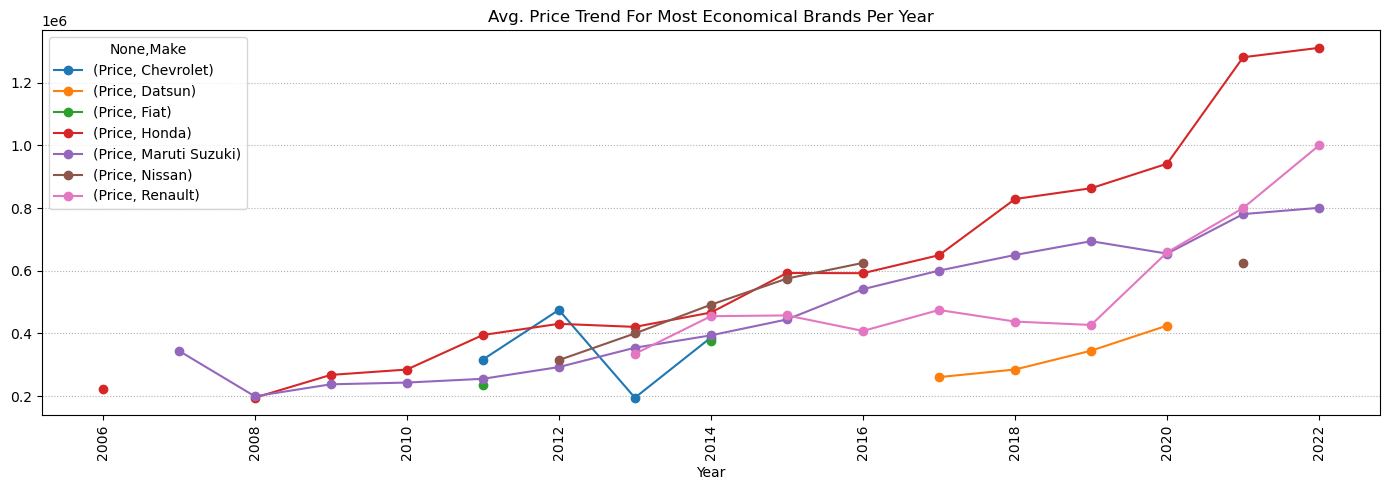

In [25]:
plot_data3=ecobrand_year_price=(
    dfc.query('Make in @eco_make and Year>2005')
    .groupby(['Make','Year'])
    .agg({'Price':'mean'})
    .sort_values('Price',ascending=False)
    .unstack(0)
)

fig,my_canvas=plt.subplots(figsize=(14,5))
ecobrand_year_price.plot(ax=my_canvas, marker='o')
plt.title("Avg. Price Trend For Most Economical Brands Per Year")
plt.xticks(rotation=90)
plt.grid(linestyle=':', axis='y')
plt.tight_layout()
plt.show()

#### Distribution of Kilometer and Price by Transmission Type and Age of Cars

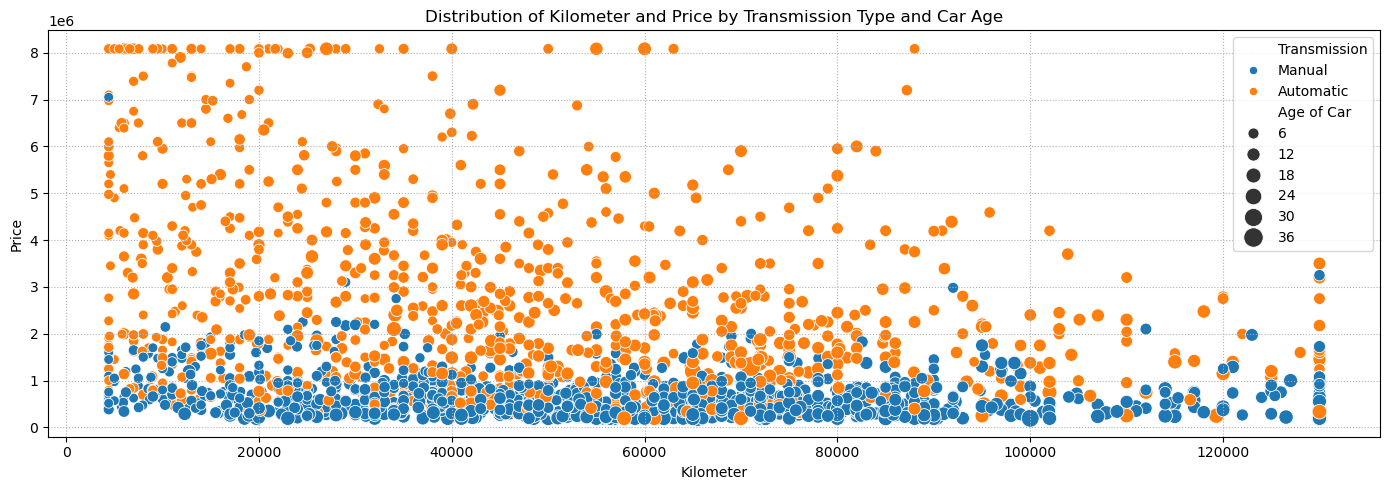

In [26]:
fig,my_canvas = plt.subplots(figsize=(14,5))
sns.scatterplot(
    data=dfc, 
    x = 'Kilometer', 
    y = 'Price', 
    hue = 'Transmission', 
    size = 'Age of Car', 
    sizes = (50,200)
)
plt.grid(linestyle=':')
plt.title('Distribution of Kilometer and Price by Transmission Type and Car Age')
plt.tight_layout()
plt.show()

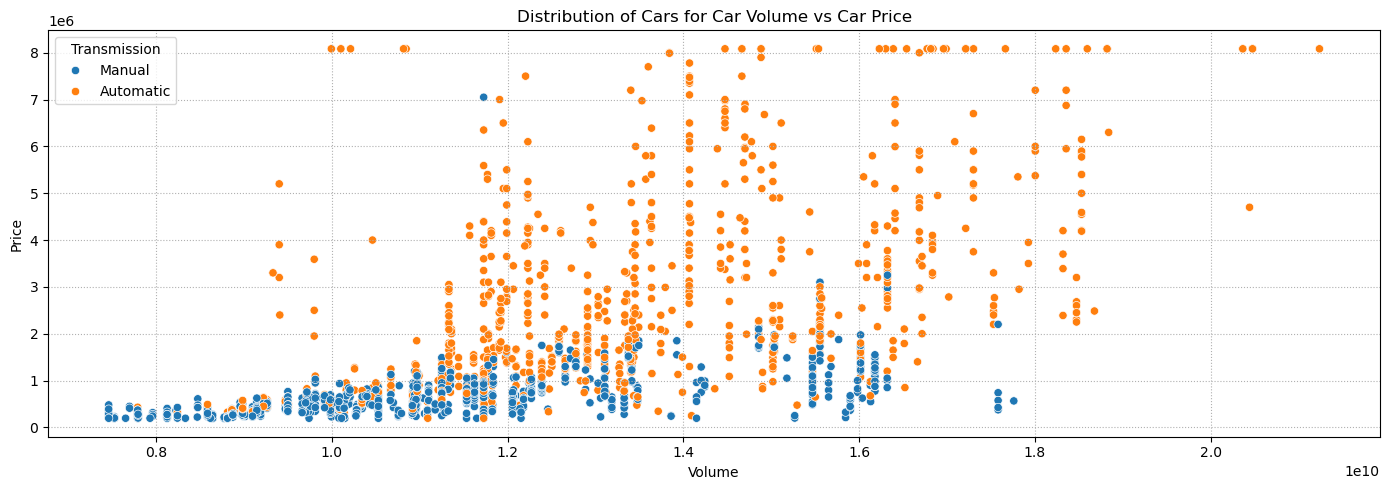

In [27]:
fig,my_canvas = plt.subplots(figsize=(14,5))
sns.scatterplot(
    data=dfc, 
    x = 'Volume', 
    y = 'Price', 
    hue = 'Transmission',
)
plt.grid(linestyle=':')
plt.title('Distribution of Cars for Car Volume vs Car Price')
plt.tight_layout()
plt.show()

###### Observation:
- Automatic cars are costlier than manual cars.
- Manual car prices shows upward trend wrt the car volume.
- Automatic car prices vary irrespective of volume.

#### Correlation Heatmap

In [28]:
correlation_matrix = dfc.select_dtypes(['int', 'float']).corr()

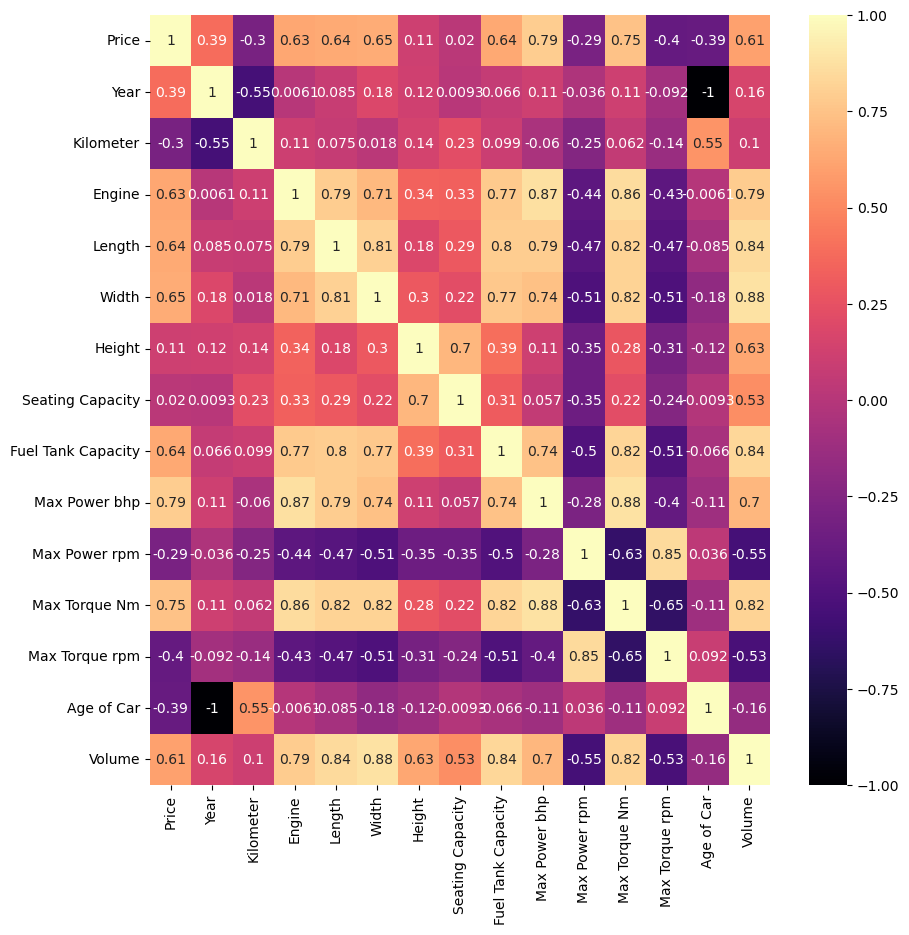

In [29]:
fig,my_canvas=plt.subplots(figsize=(10,10))
sns.heatmap(data=correlation_matrix,annot=True, cmap='magma')
plt.show()

# **9. Summary**

The Exploratory Data Analysis revealed several important insights about the used-car marketplace. The dataset contained a mix of numerical and categorical variables describing vehicle specifications, ownership details, pricing, and usage patterns. Initial profiling showed missing values in attributes such as engine capacity, power, torque, and dimensions, which were handled during preprocessing.

Price showed strong variation across brand, fuel type, transmission, and vehicle age. Premium brands and newer models commanded significantly higher prices, while older cars with higher mileage depreciated noticeably. Petrol cars dominated the listings, though diesel and CNG variants displayed distinctive pricing behavior depending on segment. Automatic transmissions were generally priced higher than manual ones.